In [1]:
import numpy as np
import time
import generalized_genSim_shorten_time_HMM as ggsdHMM
import eval_helper as eh
import matplotlib.pyplot as plt

In [2]:
# Finds the average square difference between two corresponding lists
# This function will likely be used to find the average error 
# L1 the first list
# L2 the second list
def avg_square_error(l1, l2):
    l1_len = len(l1)
    assert l1_len == len(l2), 'list lengths must be the same'
    sum = 0
    for i in range(l1_len):
        sum += (l1[i] - l2[i])**2
    return sum/l1_len

# Finds the average square error between a scaling and the wild type. 
# Does this for a number of scale factors between 0 and 1, the number
# depending on how long the function is run.
def error_finding_func(param_list, param_inds, param_name, time_run, limit):

    init_val = param_list[param_inds[param_name]]
    eh.change_params(param_list, scaled=False, is_HMM=True)
    rec_inact_tau, recov, times = ggsdHMM.RFI(channel_name='na12mut8st').genRecInactTau()
    benchmark_act, v_vec, all_is_act = ggsdHMM.Activation(channel_name='na12mut8st').genActivation()
    benchmark_inact, v_vec, all_is_inact = ggsdHMM.Inactivation(channel_name='na12mut8st').genInactivation()
    benchmark_rec = recov[0]
    
    
    fringe = [init_val - limit, init_val + limit]
    results_recov = []
    results_act = []
    results_inact = []
    start_time = time.time()
    end_time = start_time + time_run
    while time.time() < end_time:
        i = 0
        while True:
            val_2 = fringe[i + 1]
            val_1 = fringe[i]
            between_val = val_1 + (val_2 - val_1) / 2
            fringe.insert(i + 1, between_val)
            results_recov.append((between_val, scaling_error_recov(param_list, param_inds, param_name, between_val, benchmark_rec)))
            results_act.append((between_val, scaling_error_act(param_list, param_inds, param_name, between_val, benchmark_act)))
            results_inact.append((between_val, scaling_error_inact(param_list, param_inds, param_name, between_val, benchmark_inact)))
            if (val_2 == init_val + limit):
                break
            else: 
                i += 2
    results_recov.sort(key = lambda x: x[0])
    results_act.sort(key = lambda x: x[0])
    results_inact.sort(key = lambda x: x[0])
    param_list[param_inds[param_name]] = init_val
    return results_recov, results_act, results_inact

def scaling_error_recov(param_list, param_inds, param_name, scaling_factor, benchmark):
        param_list[param_inds[param_name]] = scaling_factor
        eh.change_params(param_list, scaled=False, is_HMM = True)
        rec_inact_tau, recov, times = ggsdHMM.RFI(channel_name='na12mut8st').genRecInactTau()
        return avg_square_error(recov[0], benchmark)

def scaling_error_act(param_list, param_inds, param_name, scaling_factor, benchmark):
        param_list[param_inds[param_name]] = scaling_factor
        eh.change_params(param_list, scaled=False, is_HMM = True)
        gnorm_vec, v_vec, all_is = ggsdHMM.Activation(channel_name='na12mut8st').genActivation()
        return avg_square_error(gnorm_vec, benchmark)

def scaling_error_inact(param_list, param_inds, param_name, scaling_factor, benchmark):
        param_list[param_inds[param_name]] = scaling_factor
        eh.change_params(param_list, scaled=False, is_HMM = True)
        inorm_vec, v_vec, all_is = ggsdHMM.Inactivation(channel_name='na12mut8st').genInactivation()
        return avg_square_error(inorm_vec, benchmark)

# Unzip a list of tuples into two lists x and y
def unzip(list_of_tuples):
    x = []
    y = []
    for t in list_of_tuples:
        x.append(t[0])
        y.append(t[1])
    return x, y

In [3]:
initial_params_dict = {
        'a1_0_na12mut8st' : 4.584982656184167e+01,
        'a1_1_na12mut8st' : 2.393541665657613e-02,
        'b1_0_na12mut8st' : 1.440952344322651e-02,
        'b1_1_na12mut8st' : 8.847609128769419e-02,
        'a2_0_na12mut8st' : 1.980838207143563e+01,
        'a2_1_na12mut8st' : 2.217709530008501e-02,
        'b2_0_na12mut8st' : 5.650174488683913e-01,
        'b2_1_na12mut8st' : 6.108403283302217e-02,
        'a3_0_na12mut8st' : 7.181189201089192e+01,
        'a3_1_na12mut8st' : 6.593790601261940e-02,
        'b3_0_na12mut8st' : 7.531178253431512e-01,
        'b3_1_na12mut8st' : 3.647978133116471e-02,
        'bh_0_na12mut8st' : 2.830146966213825e+00,
        'bh_1_na12mut8st' : 2.890045633775495e-01,
        'bh_2_na12mut8st' : 6.960300544163878e-02,
        'ah_0_na12mut8st' : 5.757824421450554e-01,
        'ah_1_na12mut8st' : 1.628407420157048e+02,
        'ah_2_na12mut8st' : 2.680107016756367e-02,
        'vShift_na12mut8st' : 10,
        'vShift_inact_na12mut8st' : 10
}
initial_params_list = [
    4.584982656184167e+01,
    2.393541665657613e-02,
    1.440952344322651e-02,
    8.847609128769419e-02,
    1.980838207143563e+01,
    2.217709530008501e-02,
    5.650174488683913e-01,
    6.108403283302217e-02,
    7.181189201089192e+01,
    6.593790601261940e-02,
    7.531178253431512e-01,
    3.647978133116471e-02,
    2.830146966213825e+00,
    2.890045633775495e-01,
    6.960300544163878e-02,
    5.757824421450554e-01,
    1.628407420157048e+02,
    2.680107016756367e-02,
    10,
    10
]
inds = {
    'a1_0' : 0,
    'a1_1' : 1,
    'b1_0' : 2,
    'b1_1' : 3,
    'a2_0' : 4,
    'a2_1' : 5,
    'b2_0' : 6,
    'b2_1' : 7,
    'a3_0' : 8,
    'a3_1' : 9,
    'b3_0' : 10,
    'b3_1' : 11,
    'bh_0' : 12,
    'bh_1' : 13,
    'bh_2' : 14,
    'ah_0' : 15,
    'ah_1' : 16,
    'ah_2' : 17,
    'vShift' : 18,
    'vShift_inact' : 19
}

In [4]:

errors = error_finding_func(initial_params_list, inds, 'vShift', 300, 5)


/global/u1/m/mikelam/vclamp/generalized_genSim_shorten_time_HMM.py:156: RuntimeWarning: overflow encountered in exp
  return Gmax * (vm - self.vrev) / (1 + np.exp((v_half - vm) / s))
/global/u1/m/mikelam/vclamp/generalized_genSim_shorten_time_HMM.py:164: RuntimeWarning: overflow encountered in exp
  norm_g.append(1 / (1 + np.exp(-(volt - self.v_half) / self.s)))
/global/u1/m/mikelam/vclamp/generalized_genSim_shorten_time_HMM.py:728: RuntimeWarning: invalid value encountered in log
  tau = -h.tstop / np.log(-RF_t + 1)
/global/u1/m/mikelam/vclamp/generalized_genSim_shorten_time_HMM.py:728: RuntimeWarning: divide by zero encountered in log
  tau = -h.tstop / np.log(-RF_t + 1)
/global/homes/m/mikelam/.local/cori/3.7-anaconda-2019.07/lib/python3.7/site-packages/scipy/optimize/minpack.py:794: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


In [5]:
recov, act, inact = errors
recov_x, recov_y = unzip(recov)
act_x, act_y = unzip(act)
inact_x, inact_y = unzip(inact)


Text(0, 0.5, 'Error')

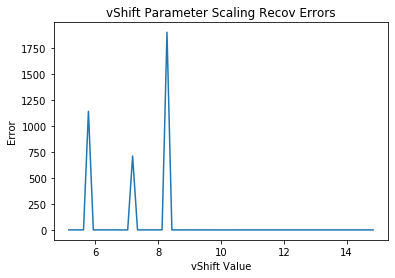

In [6]:
plt.plot(recov_x, recov_y)
plt.title('vShift Parameter Scaling Recov Errors')
plt.xlabel('vShift Value')
plt.ylabel('Error')

Text(0, 0.5, 'Error')

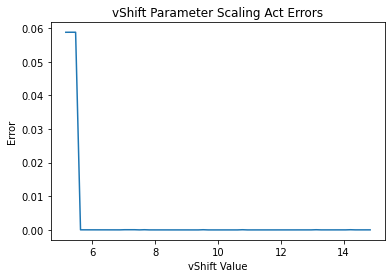

In [34]:
plt.plot(act_x, act_y)
plt.title('vShift Parameter Scaling Act Errors')
plt.xlabel('vShift Value')
plt.ylabel('Error')

Text(0, 0.5, 'Error')

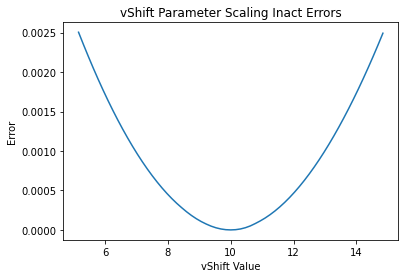

In [35]:
plt.plot(inact_x, inact_y)
plt.title('vShift Parameter Scaling Inact Errors')
plt.xlabel('vShift Value')
plt.ylabel('Error')

In [21]:
print(inact_y)

[4225.3684814359085, 4227.080972455558, 4228.751177291518]


In [22]:
print(inact_x)

[7.5, 10.0, 12.5]


In [36]:
print(len(errors[0]))

63


In [38]:
errors = error_finding_func(initial_params_list, inds, 'vShift', 300, 10)

In [39]:
recov, act, inact = errors
recov_x, recov_y = unzip(recov)
act_x, act_y = unzip(act)
inact_x, inact_y = unzip(inact)

Text(0, 0.5, 'Error')

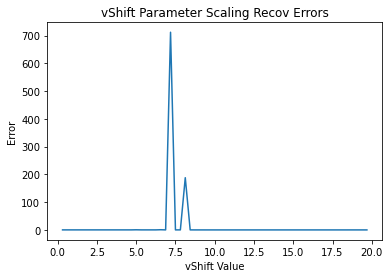

In [40]:
plt.plot(recov_x, recov_y)
plt.title('vShift Parameter Scaling Recov Errors')
plt.xlabel('vShift Value')
plt.ylabel('Error')

Text(0, 0.5, 'Error')

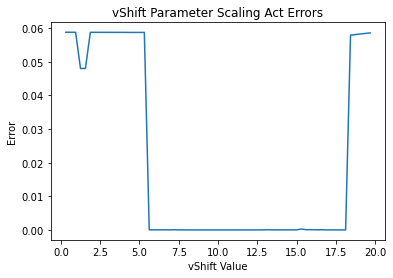

In [41]:
plt.plot(act_x, act_y)
plt.title('vShift Parameter Scaling Act Errors')
plt.xlabel('vShift Value')
plt.ylabel('Error')

Text(0, 0.5, 'Error')

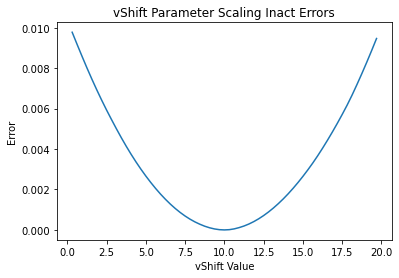

In [42]:
plt.plot(inact_x, inact_y)
plt.title('vShift Parameter Scaling Inact Errors')
plt.xlabel('vShift Value')
plt.ylabel('Error')

In [43]:
errors = error_finding_func(initial_params_list, inds, 'vShift_inact', 300, 5)

In [44]:
recov, act, inact = errors
recov_x, recov_y = unzip(recov)
act_x, act_y = unzip(act)
inact_x, inact_y = unzip(inact)

Text(0, 0.5, 'Error')

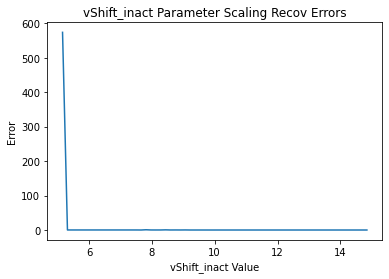

In [47]:
plt.plot(recov_x, recov_y)
plt.title('vShift_inact Parameter Scaling Recov Errors')
plt.xlabel('vShift_inact Value')
plt.ylabel('Error')

Text(0, 0.5, 'Error')

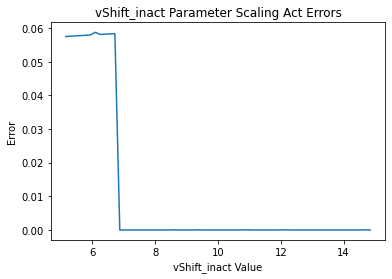

In [48]:
plt.plot(act_x, act_y)
plt.title('vShift_inact Parameter Scaling Act Errors')
plt.xlabel('vShift_inact Value')
plt.ylabel('Error')

Text(0, 0.5, 'Error')

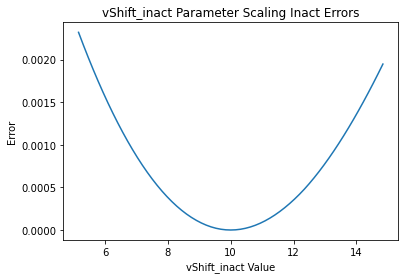

In [49]:
plt.plot(inact_x, inact_y)
plt.title('vShift_inact Parameter Scaling Inact Errors')
plt.xlabel('vShift_inact Value')
plt.ylabel('Error')

In [4]:
errors = error_finding_func(initial_params_list, inds, 'vShift_inact', 300, 10)

/Users/workbench/Applications/nrn/repo/generalized_genSim_shorten_time_HMM.py:156: RuntimeWarning: overflow encountered in exp
  return Gmax * (vm - self.vrev) / (1 + np.exp((v_half - vm) / s))
/Users/workbench/Applications/nrn/repo/generalized_genSim_shorten_time_HMM.py:164: RuntimeWarning: overflow encountered in exp
  norm_g.append(1 / (1 + np.exp(-(volt - self.v_half) / self.s)))
/Users/workbench/Applications/nrn/repo/generalized_genSim_shorten_time_HMM.py:552: RuntimeWarning: invalid value encountered in log
  tau = -h.tstop / np.log(-RF_t + 1)
/Users/workbench/Applications/nrn/repo/generalized_genSim_shorten_time_HMM.py:552: RuntimeWarning: divide by zero encountered in log
  tau = -h.tstop / np.log(-RF_t + 1)
/opt/anaconda3/lib/python3.7/site-packages/scipy/optimize/minpack.py:829: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


In [5]:
recov, act, inact = errors
recov_x, recov_y = unzip(recov)
act_x, act_y = unzip(act)
inact_x, inact_y = unzip(inact)

Text(0, 0.5, 'Error')

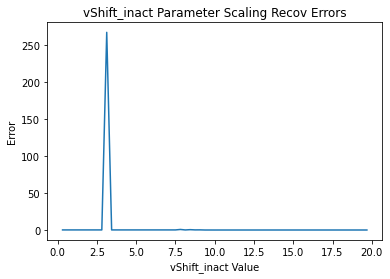

In [6]:
plt.plot(recov_x, recov_y)
plt.title('vShift_inact Parameter Scaling Recov Errors')
plt.xlabel('vShift_inact Value')
plt.ylabel('Error')

Text(0, 0.5, 'Error')

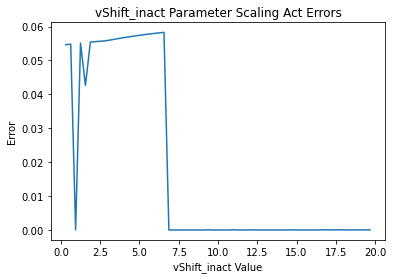

In [7]:
plt.plot(act_x, act_y)
plt.title('vShift_inact Parameter Scaling Act Errors')
plt.xlabel('vShift_inact Value')
plt.ylabel('Error')

Text(0, 0.5, 'Error')

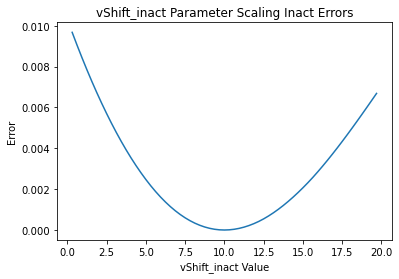

In [8]:
plt.plot(inact_x, inact_y)
plt.title('vShift_inact Parameter Scaling Inact Errors')
plt.xlabel('vShift_inact Value')
plt.ylabel('Error')

In [9]:
errors = error_finding_func(initial_params_list, inds, 'vShift_inact_local', 600, 10)

In [10]:
recov, act, inact = errors
recov_x, recov_y = unzip(recov)
act_x, act_y = unzip(act)
inact_x, inact_y = unzip(inact)

Text(0, 0.5, 'Error')

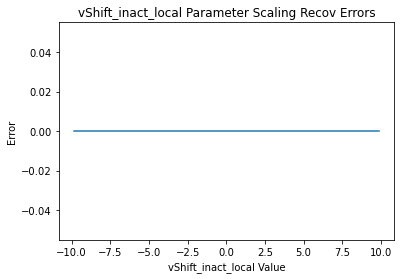

In [11]:
plt.plot(recov_x, recov_y)
plt.title('vShift_inact_local Parameter Scaling Recov Errors')
plt.xlabel('vShift_inact_local Value')
plt.ylabel('Error')

Text(0, 0.5, 'Error')

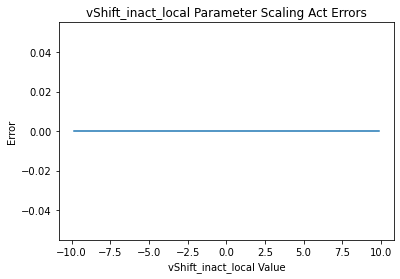

In [12]:
plt.plot(act_x, act_y)
plt.title('vShift_inact_local Parameter Scaling Act Errors')
plt.xlabel('vShift_inact_local Value')
plt.ylabel('Error')

Text(0, 0.5, 'Error')

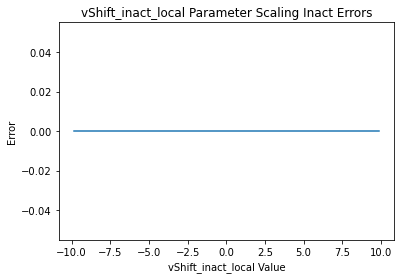

In [13]:
plt.plot(inact_x, inact_y)
plt.title('vShift_inact_local Parameter Scaling Inact Errors')
plt.xlabel('vShift_inact_local Value')
plt.ylabel('Error')